<h3> Tải thư viện gdown </h3>

In [2]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2> Lấy data từ Google Drive

In [3]:
import gdown
!mkdir -p content/data
# Download all files
file_ids = [
    '1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8',  # X_train
    '1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT',  # X_test
    '1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y',  # y_train
    '1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv'   # y_test
]

file_paths = [
    'content/data/X_train.csv',
    'content/data/X_test.csv',
    'content/data/y_train.csv',
    'content/data/y_test.csv'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8
To: /content/content/data/X_train.csv
100%|██████████| 5.03M/5.03M [00:00<00:00, 32.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT
To: /content/content/data/X_test.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 12.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y
To: /content/content/data/y_train.csv
100%|██████████| 16.9k/16.9k [00:00<00:00, 23.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv
To: /content/content/data/y_test.csv
100%|██████████| 4.24k/4.24k [00:00<00:00, 6.89MB/s]


In [4]:
# Đọc file CSV
import pandas as pd
df_x_train = pd.read_csv('content/data/X_train.csv')
df_x_test = pd.read_csv('content/data/X_test.csv')
df_y_train = pd.read_csv('content/data/y_train.csv')
df_y_test = pd.read_csv('content/data/y_test.csv')

# Hiển thị thông tin và cột
print("\n🟦 X_train:")
print(df_x_train.info())
print("Tên cột:", df_x_train.columns.tolist())

print("\n🟨 X_test:")
print(df_x_test.info())
print("Tên cột:", df_x_test.columns.tolist())

print("\n🟩 y_train:")
print(df_y_train.info())
print("Tên cột:", df_y_train.columns.tolist())

print("\n🟥 y_test:")
print(df_y_test.info())
print("Tên cột:", df_y_test.columns.tolist())


🟦 X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  8445 non-null   object
dtypes: object(1)
memory usage: 66.2+ KB
None
Tên cột: ['message']

🟨 X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  2114 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB
None
Tên cột: ['message']

🟩 y_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   category  8457 non-null   int64
dtypes: int64(1)
memory usage: 66.2 KB
None
Tên cột: ['category']

🟥 y_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 1 columns

<h2> 1. Logistic Regression với CountVectorizer (Bag of Words)


==================== Kết quả với Bag of Words (CountVectorizer) ====================
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9389782403027436
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1565
           1       0.92      0.83      0.88       549

    accuracy                           0.94      2114
   macro avg       0.93      0.90      0.92      2114
weighted avg       0.94      0.94      0.94      2114



<Figure size 1000x800 with 0 Axes>

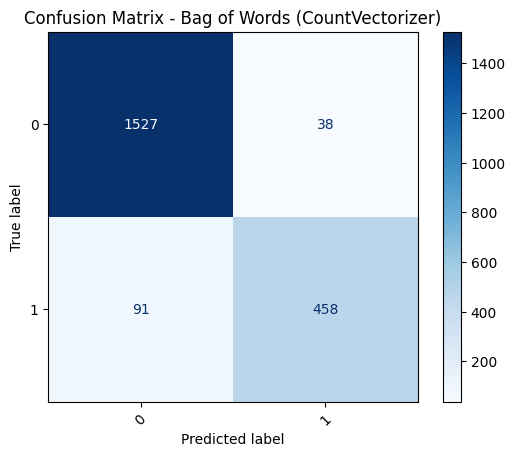

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Đọc dữ liệu
df_x_train = pd.read_csv('content/data/X_train.csv')
df_x_test = pd.read_csv('content/data/X_test.csv')
df_y_train = pd.read_csv('content/data/y_train.csv')
df_y_test = pd.read_csv('content/data/y_test.csv')

# Loại bỏ các dòng có giá trị thiếu trong cột 'message'
df_x_train = df_x_train.dropna(subset=['message'])
df_x_test = df_x_test.dropna(subset=['message'])
df_y_train = df_y_train.loc[df_x_train.index]
df_y_test = df_y_test.loc[df_x_test.index]

# Mã hóa nhãn (category)
le = LabelEncoder()
y_encoded = le.fit_transform(df_y_train['category'])
y_test_encoded = le.transform(df_y_test['category'])

# Vector hóa văn bản bằng Bag of Words
count_vectorizer = CountVectorizer(max_features=3000, stop_words='english', ngram_range=(1, 3))
X_train_bow = count_vectorizer.fit_transform(df_x_train['message'])
X_test_bow = count_vectorizer.transform(df_x_test['message'])

# Chuẩn hóa dữ liệu
scaler_bow = StandardScaler(with_mean=False)
X_train_bow_scaled = scaler_bow.fit_transform(X_train_bow)
X_test_bow_scaled = scaler_bow.transform(X_test_bow)

# Huấn luyện Logistic Regression với GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_bow = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_bow.fit(X_train_bow_scaled, y_encoded)

# Dự đoán và đánh giá
y_pred_bow = grid_bow.best_estimator_.predict(X_test_bow_scaled)
print("\n==================== Kết quả với Bag of Words (CountVectorizer) ====================")
print("Best Logistic Regression Parameters:", grid_bow.best_params_)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_bow))
print("Classification Report:\n", classification_report(
    y_test_encoded, y_pred_bow, target_names=le.classes_.astype(str)
))

# Tính confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_bow)

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Confusion Matrix - Bag of Words (CountVectorizer)')
plt.show()

<h2> 2. Logistic Regression với TF-IDF

<h3> Tải dữ liệu từ nltk

In [6]:
   import nltk
   nltk.download('punkt')
   nltk.download('punkt_tab')
   nltk.download('wordnet')
   nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True


==================== Best TF-IDF max_features=5000 with Accuracy=0.9493850520340587 ====================
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9493850520340587
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1565
           1       0.94      0.86      0.90       549

    accuracy                           0.95      2114
   macro avg       0.95      0.92      0.93      2114
weighted avg       0.95      0.95      0.95      2114



<Figure size 1000x800 with 0 Axes>

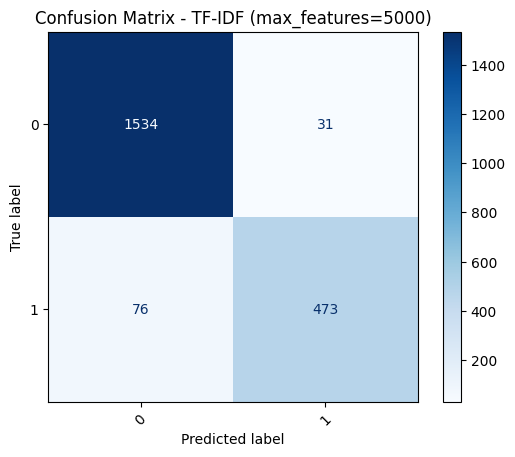

In [8]:
# 1. Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re

# 2. Xử lý dữ liệu đầu vào
# Làm sạch dữ liệu
df_x_train['message'] = df_x_train['message'].fillna('')  # Xử lý NaN
df_x_test['message'] = df_x_test['message'].fillna('')

X_raw = df_x_train['message']
y = df_y_train['category']

# 3. Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Tiền xử lý văn bản nâng cao
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Lemmatization & remove non-alpha
    return ' '.join(lemmatized)

df_x_train['message'] = df_x_train['message'].apply(preprocess)
df_x_test['message'] = df_x_test['message'].apply(preprocess)

# 5. So sánh các kích thước TF-IDF khác nhau và chọn số chiều tốt nhất
feature_sizes = [3000, 4000, 5000]  # Các số chiều khác nhau để thử
best_accuracy = 0
best_max_feat = 0

for max_feat in feature_sizes:
    # TF-IDF vectorization với 3-grams
    vectorizer = TfidfVectorizer(max_features=max_feat, stop_words='english', ngram_range=(1, 3))
    X_tfidf = vectorizer.fit_transform(df_x_train['message'])

    # Scale dữ liệu
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_tfidf)
    X_test_tfidf = vectorizer.transform(df_x_test['message'])
    X_test_scaled = scaler.transform(X_test_tfidf)

    # GridSearch để tìm Logistic Regression tốt nhất
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_encoded)

    # Dự đoán và tính accuracy
    y_pred = grid.best_estimator_.predict(X_test_scaled)
    accuracy = accuracy_score(df_y_test['category'], y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_feat = max_feat

# Sau khi loop qua tất cả các số chiều, in ra kết quả
print(f"\n==================== Best TF-IDF max_features={best_max_feat} with Accuracy={best_accuracy} ====================")

# Dùng số chiều tốt nhất để huấn luyện lại mô hình
vectorizer = TfidfVectorizer(max_features=best_max_feat, stop_words='english', ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(df_x_train['message'])

# Scale dữ liệu
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_tfidf)
X_test_tfidf = vectorizer.transform(df_x_test['message'])
X_test_scaled = scaler.transform(X_test_tfidf)

# Huấn luyện lại Logistic Regression với số chiều tốt nhất
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_encoded)

# In kết quả cuối cùng
y_pred = grid.best_estimator_.predict(X_test_scaled)
print("Best Logistic Regression Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(df_y_test['category'], y_pred))
print("Classification Report:\n", classification_report(le.inverse_transform(df_y_test['category']), le.inverse_transform(y_pred)))

# Mã hóa nhãn thực tế và dự đoán để vẽ confusion matrix
y_test_encoded = le.transform(df_y_test['category'])
y_pred_encoded = le.transform(le.inverse_transform(y_pred))  # Đảm bảo nhất quán nhãn

# Tính confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title(f'Confusion Matrix - TF-IDF (max_features={best_max_feat})')
plt.show()